# First steps with ML

### Import libraries

In [1]:
import pandas as pd
import matplotlib
import requests
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
data_file = open("./wine.data", "wb").write(requests.get(url).content)
from fastai.tabular import *

#### Imported data doesn't have column names 

In [2]:
attributes = ['Category', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 
             'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

#### Loading the data with 'attributes' as columns name

In [3]:
df = pd.read_csv("wine.data", header = None, names = attributes)
df.describe()

,Category,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


#### Checking if there is any null or NaN row

In [4]:
df[df.isnull().any(1)]

,Category,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline


#### Ploting data distribution

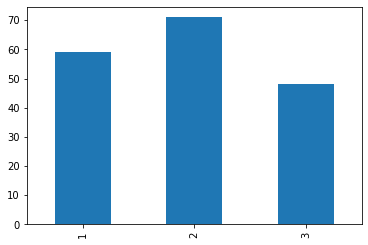

In [5]:
df['Category'].value_counts().sort_index().plot.bar() 

#### Spliting data for testing and training set

In [6]:
valid_count = int(len(df) * 0.25)

df = df.sample(frac = 1).reset_index(drop = True)

valid_idx = range(len(df) - valid_count, len(df))

print(valid_idx)

range(134, 178)


## Preprocessing data

#### Normalizing data

In [7]:
preprocessing_steps = [Normalize] 

#### Value that we want to predict

In [8]:
target_var = 'Category'

#### Passing data to the Fast.AI format 

In [9]:
data = TabularDataBunch.from_df(".", df, target_var, valid_idx=valid_idx, procs=preprocessing_steps)

## Learning

#### Creating TubularLearner object with neural network with 2 layers (200 neurons on first layer and 100 on the second)

In [10]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)

#### Fitting model to data

In [11]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,1.252932,0.766446,0.954545,00:50


## Validation

In [12]:
learn.validate()

## learn.validate(learn.data.valid_dl)

[0.7664461, tensor(0.9545)]

## Predicition

In [13]:
preds, _ = learn.get_preds(data.valid_ds)
pred_prob, pred_class = preds.max(1)
pred_prob, pred_class

(tensor([0.4269, 0.3779, 0.3972, 0.4569, 0.4528, 0.4137, 0.4657, 0.5137, 0.4405,
         0.5055, 0.4011, 0.4388, 0.4093, 0.4251, 0.4771, 0.4434, 0.4589, 0.5297,
         0.4442, 0.4087, 0.5019, 0.4388, 0.5165, 0.3752, 0.4670, 0.4886, 0.4398,
         0.4185, 0.5107, 0.5153, 0.4042, 0.4589, 0.3695, 0.4611, 0.4095, 0.4802,
         0.4326, 0.4949, 0.5310, 0.4831, 0.4708, 0.4341, 0.4062, 0.3874, 0.4395,
         0.5347, 0.4368, 0.4672, 0.4653, 0.4738, 0.4479, 0.4140, 0.4914, 0.4918,
         0.4532, 0.5007, 0.4054, 0.5657, 0.4388, 0.3778, 0.3911, 0.4557, 0.5340,
         0.4893, 0.5335, 0.4742, 0.4919, 0.4297, 0.4149, 0.4411, 0.4602, 0.5846,
         0.4214, 0.4706, 0.4019, 0.3776, 0.4145, 0.4656, 0.4895, 0.4844, 0.4297,
         0.4165, 0.4512, 0.4760, 0.5070, 0.4193, 0.5139, 0.4506, 0.5372, 0.4417,
         0.4237, 0.3786, 0.4762, 0.4560, 0.4119, 0.3973, 0.3575, 0.4180, 0.4727,
         0.4387, 0.4978, 0.4996, 0.4427, 0.4337, 0.4075, 0.3812, 0.4541, 0.4897,
         0.6053, 0.4916, 0.4